### Recommender Systems with Python.

### Import the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

### Loading the datasets

In [5]:
c_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [6]:
df = pd.read_csv('u.data', sep='\t', names=c_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Importing the movie Titles

In [8]:
movies_title = pd.read_csv('Movie_Id_Titles')

In [9]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merging the u.data with the movie_id_title at item_id

In [11]:
df = pd.merge(df, movies_title, on='item_id')

In [12]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


#### Checking the movies with the best ratings

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [16]:
%matplotlib inline 

In [17]:
sns.set_style ('white')

In [22]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

#### Checking the movies with the most ratings

In [25]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

#### Craeting a DataFrame of movie rating and the number of ratings

In [29]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [30]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


#### Adding number of ratings column

In [80]:
ratings['No of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


#### Creating a  histogram for visualization the No of ratings 

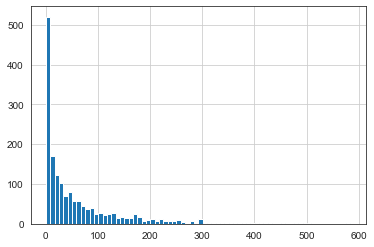

In [81]:
ratings['No of ratings'].hist(bins=70)

***From the histogram above most of the movies were not rated while the top rated were wactched by few people.***

#### Creating a histogram to visualize the ratings of the movies

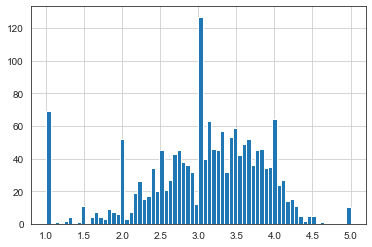

In [40]:
ratings['rating'].hist(bins=70)

***From the histogram above, the movies with the average ratings ahd the highest number of viewership while the top rated movie had only a few views.***

#### The relationship between the actual average ratings and the number of ratings

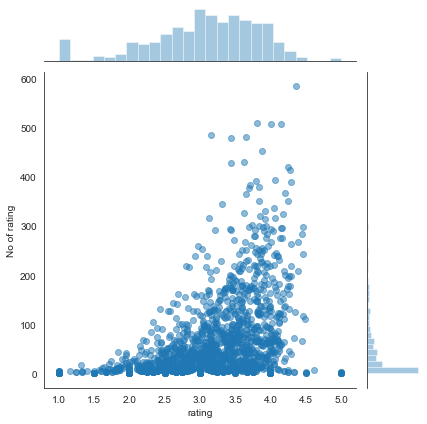

In [82]:
sns.jointplot(x='rating',y='No of ratings',data=ratings,alpha=0.5)

***From the relational distributuion above the more the number of rating a movie had, the higher the number the number of views. It is also noted that the movies with the low number of rating had a low number of views.***

### Creating a matrix that has the user ids on one access and the movie title on another axis.

In [45]:
df.head() #our previous Dataframe from which we are going to grab, the users_id, rating, title

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [49]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [50]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***From the data above, most of the NaN values indicated the movies that were either watched or rated***

In [83]:
ratings.sort_values('No of ratings', ascending=False).head(10) #Checking the most rated movies

,rating,No of ratings,No of rating
title,,,
Star Wars (1977),4.359589,584,584
Contact (1997),3.803536,509,509
Fargo (1996),4.155512,508,508
Return of the Jedi (1983),4.007890,507,507
Liar Liar (1997),3.156701,485,485
"English Patient, The (1996)",3.656965,481,481
Scream (1996),3.441423,478,478
Toy Story (1995),3.878319,452,452
Air Force One (1997),3.631090,431,431


#### Grabing the user ratings of two movies 'Fargo (1996)' and 'Contact (1997)'. Can chose any.

In [56]:
fargo_user_ratings = moviemat['Fargo (1996)']
contact_user_ratings = moviemat['Contact (1997)'] 

####  using corrwith() method to get correlations between two pandas series

In [57]:
similar_to_fargo = moviemat.corrwith(fargo_user_ratings)
similar_to_contact = moviemat.corrwith(contact_user_ratings)

/home/timon/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/timon/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### Data cleaning by removing NaN values and using a DataFrame instend of series.

In [58]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


***Now if we sort the dataframe by correlation, we should get the most similar movies.***

In [78]:
corr_fargo.sort_values('Correlation',ascending=False).head(20)

,Correlation,No of ratings
title,,
Open Season (1996),1.0,2
Maya Lin: A Strong Clear Vision (1994),1.0,4
Captives (1994),1.0,3
City of Industry (1997),1.0,6
"Convent, The (Convento, O) (1995)",1.0,2
Fargo (1996),1.0,508
"Smile Like Yours, A (1997)",1.0,25
"Journey of August King, The (1995)",1.0,4
King of the Hill (1993),1.0,4


***Filtering out movies that have less than 100 reviews*** 

In [86]:
#corr_fargo = corr_fargo.join(ratings['No of ratings'])
corr_fargo.head()

,Correlation,No of ratings,No of rating
title,,,
'Til There Was You (1997),0.100000,9,9
1-900 (1994),0.866025,5,5
101 Dalmatians (1996),-0.245368,109,109
12 Angry Men (1957),0.098676,125,125
187 (1997),0.142509,41,41


In [90]:
corr_fargo.drop('No of ratings', inplace=True, axis=1)

In [92]:
corr_fargo.head()

,Correlation,No of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [93]:
corr_fargo[corr_fargo['No of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


In [95]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact = corr_contact.join(ratings['No of ratings'])
corr_contact[corr_contact['No of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
